### Reference: <br>
Data science basics<br>
Doing Data Science<br>
By: Cathy O'Neil; Rachel Schutt<br>
Publisher: O'Reilly Media, Inc.<br>
Pub. Date: October 24, 2013<br>
Print ISBN-13: 978-1-4493-5865-5<br>
Chapter 3 <br>
http://proquest.safaribooksonline.com.proxy.lib.odu.edu/book/databases/9781449363871

Python Data Science Handbook <br>
Essential Tools for Working with Data <br>
By Jake VanderPlas<br>
Publisher: O'Reilly Media <br>
Release Date: November 2016 <br>
http://proquest.safaribooksonline.com.proxy.lib.odu.edu/book/programming/python/9781491912126 <br>
code example discussed in the notebook is adapted from the code accompanied with this text: <br>

https://jakevdp.github.io/PythonDataScienceHandbook/05.05-Naive-Bayes.ipynb

### Simple Naïve Bayes Example

Consider six emails in our training set.

- Email 1:  “send us your password” (spam)
- Email 2:  “send us your review” (ham)
- Email 3:  “review  password” (ham)
- Email 4:  “review us” (spam)
- Email 5:  “send your password” (spam)
- Email 6:  “send us your account” (spam

Let us calculate some basis statistics:

p(an email is a spam) = p(spam)  = 4/6  (Note 4 out of six emails are spam)
p(an email is a ham) =   p(ham)   = 2/6

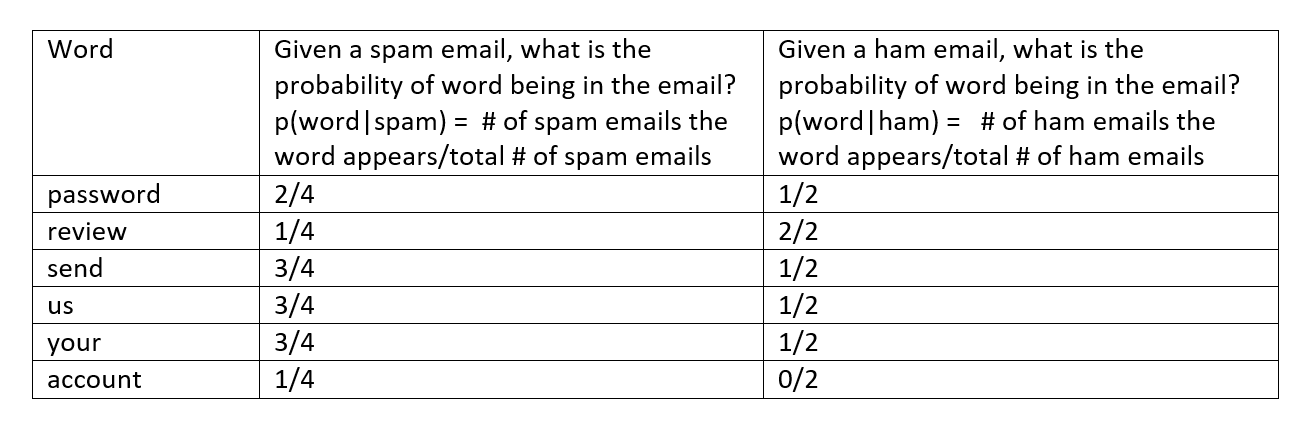



Let us assume now that we have a new email that we want to classify as spam or ham. Further assume that the email consists of only one word “password”.  For this case, we are interested in finding 

p(spam|password): probability that the email is spam if it has the word password.
p(ham|password): probability that the email is ham if it has the word password.

Using Baye’s Law

p(spam|password)p(password)  =  p(password|spam)p(spam)

p(spam| password)  =  p(password|spam)p(spam)/ p(password)

p(password)  = p(password|spam)p(spam) + p(password|ham)p(ham)  

p(password)  = (2/4)(4/6)  +  (1/2)(2/6)  = 1/3  +  1/6 = 1/2 = 0.5

p(spam|password)  =  (2/4)(4/6) /0.5 = 2/3 = 0.66

Similarly,

p(ham|password) = p(password|ham)p(ham)/ p(password) = (1/2)(2/6)/0.5 = 0.33

We classify the new email consisting of one word “password’ as  spam. 

Now consider that our new email has more than one word, say “review your  password”. We create  an x vector to  represent the email in the following way (bag of words). The size of vector x is the size of dictionary. For our example we are working with dictionary of only six words.

        password        review       send        us          your           account
        
    x   1               1            0           0           1              0
        
        
        
p(spam|110010) p(110010)  =    p(110010|spam) p(spam)   

p(spam|110010)            =    p(110010|spam) p(spam) / p(110010) 

p(ham|110010)             =    p(110010|ham) p(ham) / p(110010)   

Assumption (naive): presence/absence of a word in an email is independent of other words.  This assumption is typically wrong, and very often words co-occur.


 p(110010|spam)     =   p(password|spam) *  p(review|spam)  * (1 -  p(send|spam))  *  (1 - p(us|spam)) *
                                         p(your|spam) * (1 – p(account|spam))

                    =  (2/4) * (1/4) * (1-3/4) * (1-3/4) * (3/4) * (1-1/4)
                 

                    =   0.004395
             
Similarly,

p(110010|ham)     =   (1/2) * (2/2) * (1-1/2) * (1-1/2) * (1/2) * (1-0/2)
                  =  0.0625


Also,

p(110010)  =    p(110010|spam) p(spam)    +   p(110010|ham) p(ham)  = 0.023763


p(spam|110010) =  p(110010|spam) p(spam) / p(110010) = 0.123

p(ham|110010)   =    p(110010|ham) p(ham) / p(110010)  = 0.877

Exercise: Classify the following new email as being spam or ham.

Email: "review account password"

x = 1 1 0 0 0 1

p(x|spam) = p(password|spam) p(review|spam) (1-p(send|spam)) (1-p(us|spam)) (1-p(your|spam)) * p(account|spam)
          =  (2/4) * (1/4) * (1-3/4) * (1-3/4) * (1-3/4) * (1/4)     = 0.00048828          
p(x|ham)     =   (1/2) * (2/2) * (1-1/2) * (1-1/2) * (1-1/2) * (0/2) = 0
p(x)  =    p(x|spam) p(spam)    +   p(x|ham) p(ham)  = 


p(spam|x) =  p(x|spam) p(spam) / p(x) = 

p(ham|x)   =    p(x|ham) p(ham) / p(x)  = 

In [1]:
px_spam=(2/4) * (1/4) * (1-3/4) * (1-3/4) * (1-3/4) * (1/4) 
px_ham=(1/2) * (2/2) * (1-1/2) * (1-1/2) * (1-1/2) * (0/2)
px=px_spam*(4/6)+px_ham*(2/6)
pspam_x=(px_spam*(4/6))/px
psham_x=(px_ham*(2/6))/px
print(pspam_x,psham_x)

1.0 0.0


### Smoothing
From the table above, we have 

$p(account|ham) = $  number of ham emails with word 'account'/total number of ham emails $= 0/2$

One would like to avoid probabilities of $0$ or $1$. For this we add an $\alpha$ parameter

$p(account|ham) = (0+\alpha)/(2 + 2*\alpha)$.

$\alpha = 0$ implies no smoothing. Default value of $\alpha = 1.0$. Note that $\alpha$ is added for calculation of all probabilities excluding p(spam) and p(ham).

Exercise: Repeat the classification problem for the new email "review account password" with smoothing. Use $alpha=1.0$. Compute the probability of the new email being a spam and the probability of the new email being a ham. 

In [ ]:
alpha=1.0
px_spam=(((2+alpha)/(4+2*alpha))*((1+alpha)/(4+2*alpha))*(1-(3+alpha)/(4+2*alpha))*(1-(3+alpha)/(4+2*alpha))*
(1-(3+alpha)/(4+2*alpha))*((1+alpha)/(4+2*alpha)))
px_spam

In [ ]:
px_ham=(((1+alpha)/(2+2*alpha))*((2+alpha)/(2+2*alpha))*(1-(1+alpha)/(2+2*alpha))*
(1-(1+alpha)/(2+2*alpha))*(1-(1+alpha)/(2+2*alpha))*((0+alpha)/(2+2*alpha)))
px_ham

In [66]:
px = px_spam*(4/6)+px_ham*(2/6)
pspam_x=(px_spam*(4/6))/px
pham_x=(px_ham*(2/6))/px
print(pspam_x)
print(pham_x)

0.2598984771573604
0.7401015228426395


Note that the general form for the expression

p(110010|spam)     =   p(password|spam)   p(review|spam)  (1 -  p(send|spam))  (1 - p(us|spam)) 
                                         p(your|spam)  (1 – p(account|spam))

is given by

\begin{align*}
p(x|spam)  = & p(password|spam)^{x[0]}  (1-p(password|spam)^{1-x[0]}   p(review|spam)^{x[1]} (1-p(review|spam)^{(1-x[1])} \\
 & p(send|spam)^{x[2]}  (1-p(send|spam)^{(1-x[2])}  p(us|spam)^{x[3]}  (1-p(us|spam)^{(1-x[3])}  \\
 & p(your|spam)^{x[4]}  (1-p(your|spam)^{(1-x[4])}  p(account|spam)^{x[5]} (1-p(account|spam)^{(1-x[5])} 
\end{align*}

This is the same as in the text:

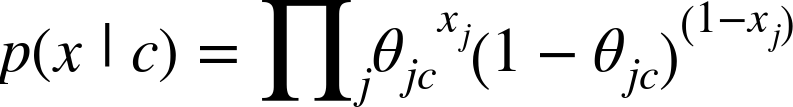

Some simplification.

Note that in our example, we computed

P(spam|110010) =    p(110010|spam) p(spam) / p(110010) = 0.123

p(ham|110010)   =    p(110010|ham) p(ham) / p(110010)  = 0.877

As we are only interested in which of the two probability is greater we can skip dividing by p(110010)

p(110010|spam) p(spam)   =  0.00293

p(110010|ham) p(ham)       =  0.02083

In general we need to compute:  p(x|c) *  p(c).  We can take log of this expression and still select the right class based on which of the two logarithm expressions is larger.

$\log⁡(p(x│c) p(c)) = \log⁡ p(x│c) + \log⁡ p(c)$

As,

$p(x|c) = \prod \limits_j \theta_j^{x_j} (1 - \theta_j )^{1 - x_j} =  \prod \limits_j \left( \frac{\theta_j}{1-\theta_j} \right)^{x_j} (1-\theta_j)$

Taking log on both side

$\log p(x|c) = \sum \limits_j x_j \log \left( \frac{\theta_j}{1-\theta_j} \right) + \sum \limits_j \log (1-\theta_j) $


$\log p(x|c) = \sum \limits_j x_j \log w_j + w_0 $


A typical machine learning algorithm based on naive bayes compute $w$'s based on the training data. 

In [3]:
import numpy as np
from sklearn.naive_bayes import BernoulliNB

In [4]:
# generate one observation that uses a vector of size 100 (like dictionary of size 100)
X = np.random.randint(2, size=(6, 100))
Y = np.array([1, 0, 1, 0, 0, 1])
#Y = np.array([1, 2, 3, 4, 4, 5])

In [5]:
X[0]

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0])

In [6]:
clf = BernoulliNB(alpha=0.00001)
clf.fit(X, Y)

BernoulliNB(alpha=1e-05, binarize=0.0, class_prior=None, fit_prior=True)

In [7]:
print(clf.predict(X[2:4]))

[1 0]


In [8]:
#          password        review       send        us          your           account
# 1: spam, 0: non-spam (ham)
# Email 1:  “send us your password” (spam)
X = np.empty([6, 6], dtype=int)
X[0] = np.array([1, 0, 1, 1, 1, 0])
Y[0] = 1
# Email 2:  “send us your review” (ham)
X[1] = np.array([0, 1, 1, 1, 1, 0])
Y[1] = 0
# Email 3:  “review  password” (ham)
X[2] = np.array([1, 1, 0, 0, 0, 0])
Y[2] = 0
# Email 4:  “review us” (spam)
X[3] = np.array([1, 1, 0, 0, 0, 0])
Y[3] = 1
# Email 5:  “send your password” (spam)
X[4] = np.array([1, 0, 1, 0, 1, 0])
Y[4] = 1
# Email 6:  “send us your account” (spam)
X[5] = np.array([0, 0, 1, 1, 1, 1])
Y[5] = 1

In [9]:
clf = BernoulliNB(alpha=0.0000001)
clf.fit(X, Y)

BernoulliNB(alpha=1e-07, binarize=0.0, class_prior=None, fit_prior=True)

In [10]:
# New Email “review your password”
T = np.empty([1,6], dtype=int)
T[0] = np.array([1, 1, 0, 0, 1, 0])

In [11]:
print(clf.predict(T))

[0]


In [12]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [27]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [28]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [38]:
print(np.max(train.target))
print (train.target[0:20])

3
[2 2 1 2 0 3 1 0 3 3 2 0 1 2 3 2 2 0 1 0]


In [39]:
from sklearn.feature_extraction.text import CountVectorizer

In [40]:
vectorizer = CountVectorizer(binary='true') # all non-zero count set to 1

In [41]:
vectorizer

CountVectorizer(analyzer='word', binary='true', decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [42]:
TK = vectorizer.fit_transform(train.data)


In [43]:
TKD = TK.todense()

In [44]:
TKD[0:]

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [45]:
clf = BernoulliNB()
clf.fit(TK, train.target)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [46]:
TS = vectorizer.transform(test.data)

In [47]:
labels = clf.predict(TS)

In [48]:
labels

array([3, 0, 1, ..., 1, 2, 1], dtype=int64)

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
%matplotlib inline
import matplotlib.pyplot as plt

Text(92.68,0.5,'predicted label')

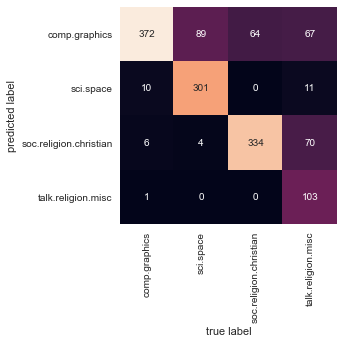

In [50]:
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [52]:
# https://en.wikipedia.org/wiki/Tf%E2%80%93idf
vectorizer = TfidfVectorizer()

In [53]:
vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [54]:
TK = vectorizer.fit_transform(train.data)

In [55]:
TK

<2153x35329 sparse matrix of type '<class 'numpy.float64'>'
	with 352179 stored elements in Compressed Sparse Row format>

In [56]:
clf = MultinomialNB()

In [57]:
clf.fit(TK, train.target)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [58]:
TS = vectorizer.transform(test.data)

In [59]:
TS

<1432x35329 sparse matrix of type '<class 'numpy.float64'>'
	with 230051 stored elements in Compressed Sparse Row format>

In [60]:
labels = clf.predict(TS)

In [61]:
labels

array([2, 0, 1, ..., 1, 2, 1], dtype=int64)

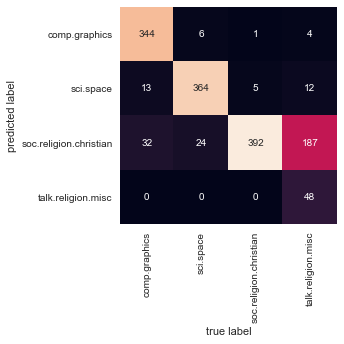

In [62]:
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Exercise: Replace 'talk.religion.misc' category by 'talk.politics.guns' to your dataset. Use BernoulliNB() for training and classification and plot the confusion matrix.

In [72]:
categories1 = ['talk.politics.guns', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train1 = fetch_20newsgroups(subset='train', categories=categories1)
test1 = fetch_20newsgroups(subset='test', categories=categories1)
vectorizer1 = CountVectorizer(binary='true')
TK1 = vectorizer1.fit_transform(train1.data)
TKD1 = TK1.todense()
clf1 = BernoulliNB()
clf1.fit(TK1, train1.target)
TS1 = vectorizer1.transform(test1.data)
labels1 = clf1.predict(TS1)

Text(92.68,0.5,'predicted label')

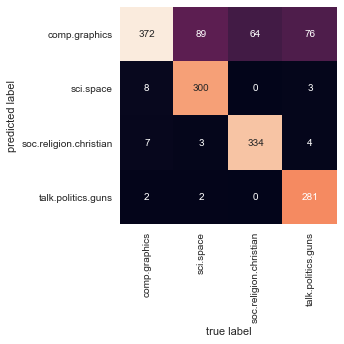

In [73]:
mat = confusion_matrix(test1.target, labels1)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train1.target_names, yticklabels=train1.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

Exercise: For the updated data set used in the previous exercise, use MultinomialNB for training and classification and plot the confusion matrix. Compare the results with the previous exercise. Which of the two classification algorithm you will select for this problem?

In [75]:
vectorizer2 = TfidfVectorizer()
TK2 = vectorizer2.fit_transform(train1.data)
clf3 = MultinomialNB()
clf3.fit(TK2, train1.target)
TS2 = vectorizer2.transform(test1.data)
labels2 = clf3.predict(TS2)

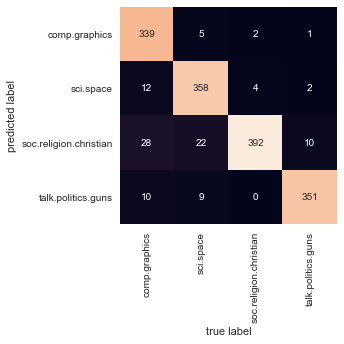

In [76]:
mat = confusion_matrix(test1.target, labels2)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train1.target_names, yticklabels=train1.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

we will definitely choose the second algorithm. the second one have more accracy. comparing the first one, when predicting sci space, soc. religion christian, talk politics guns the first one got more error.